In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Please input the path of the 696_Project folder into the empty string:
root_path = ""

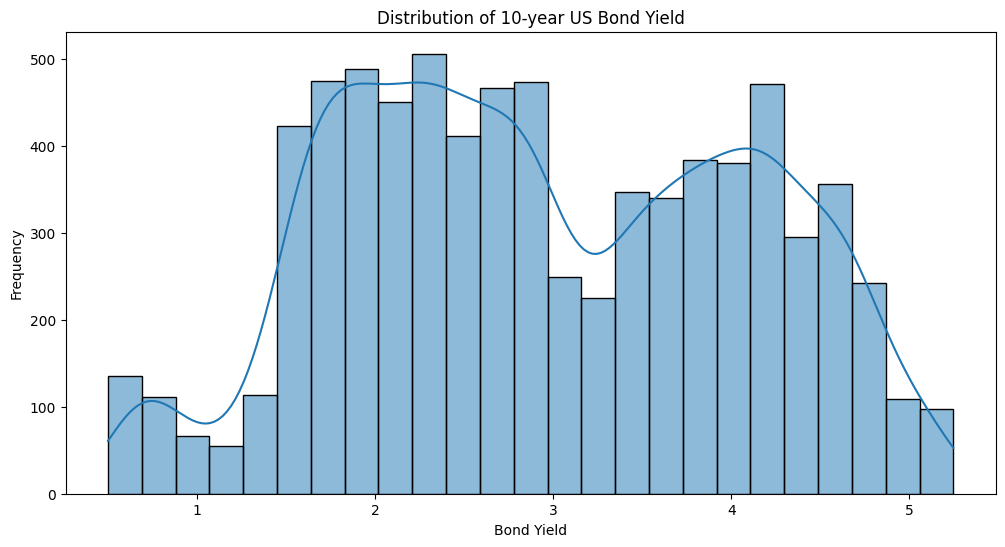

In [ ]:
# Load in the data
data = pd.read_csv(root_path + "/Autoencoder_696/final_dataset.csv")
data.head()

# Display initial visual representations:
data['date'] = pd.to_datetime(data['date'])

# Distribution of the bond yield
plt.figure(figsize=(12, 6))
sns.histplot(data['bond_yield'], kde=True)
plt.title('Distribution of 10-year US Bond Yield')
plt.xlabel('Bond Yield')
plt.ylabel('Frequency')
plt.show()


In [ ]:
Autoencoder_anomaly_dates = pd.read_pickle(root_path + '/Autoencoder_696/Autoencoder_anomaly_dates.pkl')
DBSCAN_anomaly_dates = pd.read_pickle(root_path + '/DBSCAN_696/DBSCAN_anomaly_dates.pkl')

In [ ]:
same_anomaly_dates = list(set(Autoencoder_anomaly_dates).intersection(set(DBSCAN_anomaly_dates)))

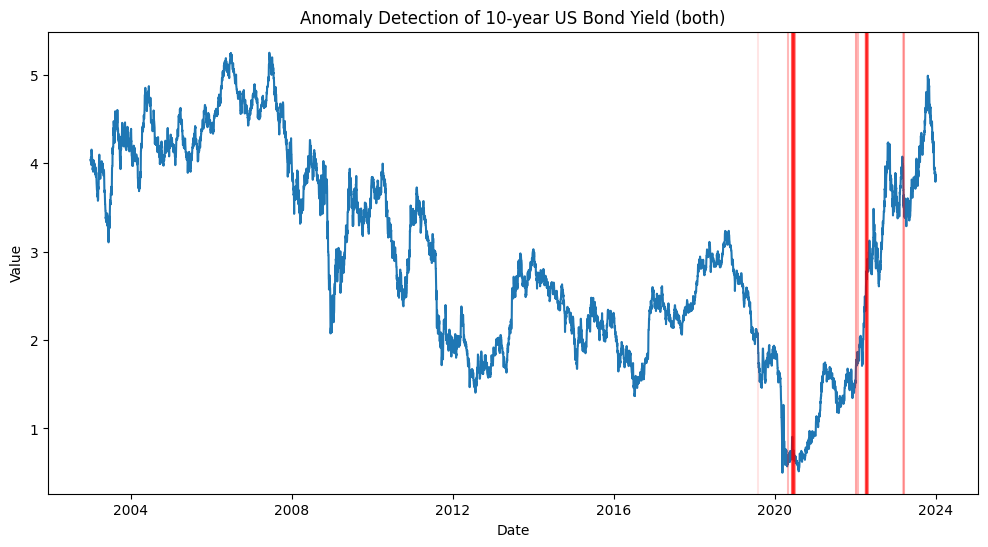

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['bond_yield'])
for date in same_anomaly_dates:
    plt.axvline(x=date, color='red', alpha=0.1)

plt.title('Anomaly Detection of 10-year US Bond Yield (both)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

Because this anomly detection process used two methods that are unsupervised, we have no means of comparing the results between the Autoencoder and DBSCAN in terms of their accuracy as we do not have the actual labels for if the time points are anomalous or not. However, we can aggregate their results and consider the intersection of their sets of anomalous time points that each method detected. The intersection is a significant reduction in size to only 71 time points, which is just around 0.98% of our initial sample size.

The timeline of the anomalous dates begin at the start of August 2019, with sporadic periods spanning in 1st, May 2020 - 6th, May 2020 and all of June 2020. There are more sporadic periods across the majority of Jan 2022 and majority of April 2022. Finally, there is a final period spanning the first two weeks of March 2023. A primary observation is that the sporatic periods are primarily during the 1st quarter periods of business cycles, and that there are no anomalies in the third or fourth quarters. Additionally, all points are within the period where markets have been strongly impacted by COVID, or are still in the recovery phase from the effects of COVID. However, it is also important to specify that the bond yield patterns in the various anomalous periods are not all the same. The periods of 1st, May 2020 - 6th, May 2020 and all of June 2020 both cover a sharp decline in bond yield rates, with the June period highlighting a significantly greater decline displayed for bond yield rates. Conversely, the periods across the majority of Jan 2022 and majority of April 2022 show a sharp increase in bond yield rates over their time. However, the final period spanning the first two weeks of March 2023 covers another sharp decline.

There are many contributing factors that may have lead to these results. From cross-referencing articles that were published around these periods, we have several conjectures that explain the patterns denoted in each respective period.

**1st, May 2020 - 6th, May 2020:** This time period coincides with the global COVID-19 pandemic, which had a significant impact on financial markets worldwide. During this period, financial markets experienced heightened volatility, sharp declines, and subsequent recoveries as governments and central banks implemented measures to mitigate the economic impact of the pandemic. Factors such as lockdowns, travel restrictions, and disruptions in supply chains contributed to market uncertainties and potentially influenced the anomalous behavior detected in your financial data.

**June 2020:** Again, this period coincides with the global COVID-19 pandemic. However, this is the period where factors such as lockdowns, travel restrictions, and disruptions in supply chains as regulations became more strictly enforced on a global scale. This period, unlike the first suffered more as the consecutive effects of the mentioned factors had built up as time went on.


**Jan/April 2022:** Both these periods fall within the phase of global economic recovery from the COVID-19 pandemic. As vaccination efforts progressed and restrictions eased in many regions, there may have been increased optimism about economic growth prospects. Positive economic indicators, such as improving GDP growth, declining unemployment rates, or rising consumer and business confidence, can contribute to higher bond yield rates and positive movements in financial indices.

**March 2023:** This period is unique in that it is on the borderline of recovery from the COVID-19 pandemic. Rather, it seems that this was primarily a phase where there were a lot of changes within the workforce as many companies began to lay off workers. This parallels with the notion that 1st quarter patterns are often influenced by factors such as year-end financial reporting or changes in market dynamics. As a result, it is the workforce that is usually impacted as shareholders consider shifts in investment strategies by reforming budgets and capital often through layoffs. With higher unemployment, this also impacts  broader economic factors such as spending and other consumer indices.
